## Training Simple Machine Learning Algorithms for Classification

>  We will make use of two of the first algorithmically described machine learning algorithms for classification: the perceptron and adaptive linear neurons.

### Key takeaways
1. Building an understanding of machine learning algorithms
2. Using pandas, NumPy, and Matplotlib to read in, process, and visualize data
3. Implementing linear classifiers for 2-class problems in Python

📕 Resources : https://sebastianraschka.com/pdf/lecture-notes/stat453ss21/L03_perceptron_slides.pdf


### In perceptron decision function is unit-step function

z = w1x1 + ... + wmxm + b = wTx + b

<div>
    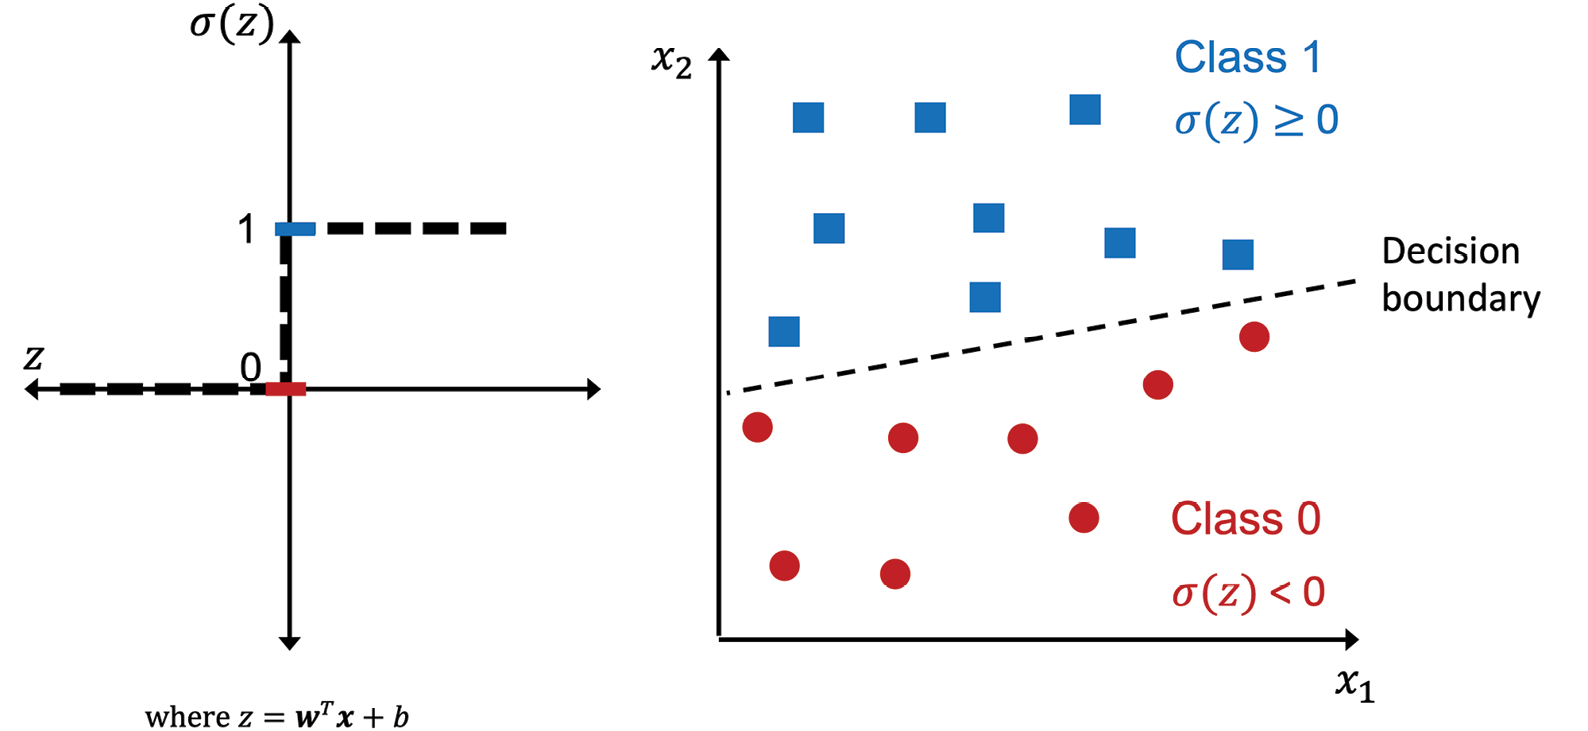
</div>


### Quick flow of perceptron

<div>
    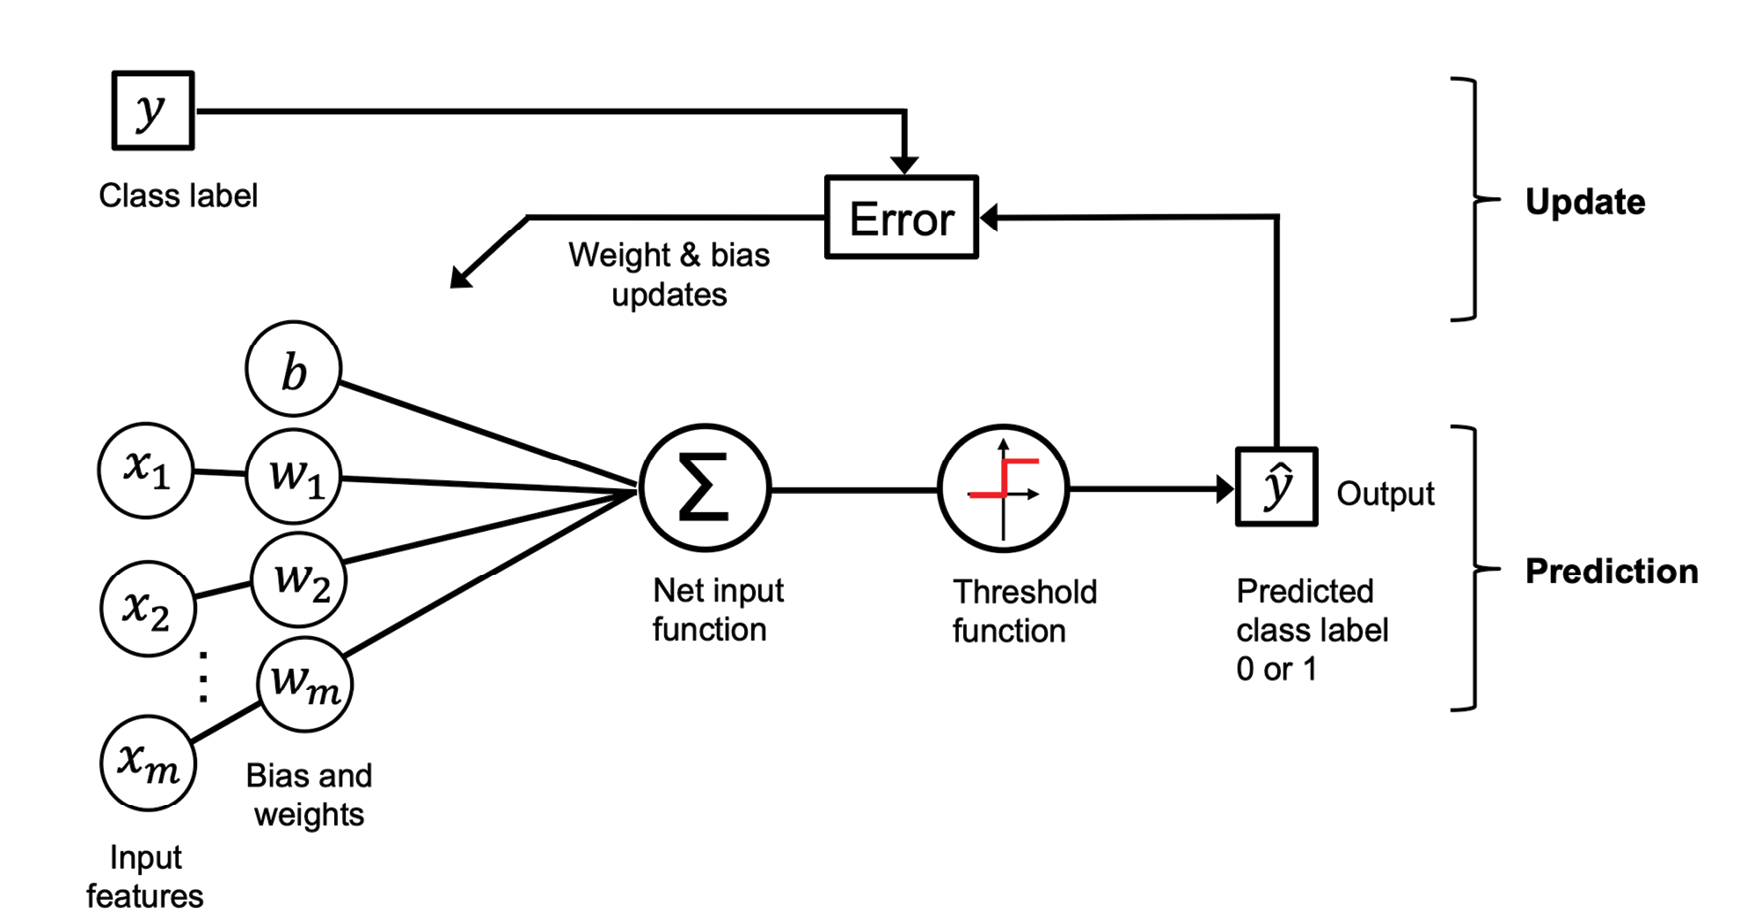
</div>


In [1]:
import numpy as np

In [17]:
class Perceptron:
    """
    Perceptron classifier
    
    Parameters
    --------------
    eta: float
        learning rate (between 0 to 1)
        
    n_iter : int
        passes over the training dataset (epochs)
        
    random_state : int
        Random number generator seed for random weight initiatlisation
        
    
    Attributes
    ---------------
    w_ : 1d-array
        weights after fitting
    b_ : scalar
        bias unit after fitting
    errors_ : list
        number of misclassifications (updates) in each epochs
        
    """
    
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta=eta
        self.n_iter=n_iter
        self.random_state=random_state
        
    def fit(self, X, y):
        """
        fit training data
        
        X: {array-like}, shape= [n_examples, n_features]
            Training vectors, where n_examples is the number of example and n_features is the number of features
            
        y : {array-like} , shape=[n_examples]
            Target values.
        
        Returns
        ---------
        self: object
        
        """
        rgen=np.random.RandomState(self.random_state)
        self.w_=rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_=np.float_(0.)
        self.errors_=[]
        
        for _ in range(self.n_iter):
            errors=0
            for xi, target in zip(X,y):
                update = self.eta * (target - self.predict(xi))
                self.w_+=update*xi
                self.b_+=update
                errors+=int(update !=0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self,X):
        """Calculate net input"""
        return np.dot(X, self.w_)+ self.b_
    
    def predict(self,X):
        """
        return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1,0)
                
        
        
        
        

Technically, we could initialize the weights to zero (in fact, this is done in the original perceptron algorithm). However, if we did that, then the learning rate (eta) would have no effect on the decision boundary. If all the weights are initialized to zero, the learning rate parameter, eta, affects only the scale of the weight vector, not the direction

## Training a perceptron model on the IRIS Dataset

📝 OVR (one versus Rest) or OVA (one versus All )  is a multi-class classification technique. Using OVR we can keep 1 class positive and rest negative. 

In [18]:
import os
import pandas as pd

In [24]:
path= 'IRIS.csv'
column_dtype = {0: 'float', 1: 'float', 2: 'float', 3: 'float'}

# Read the CSV and apply the dtype conversion
df = pd.read_csv(path, header=None, skiprows=1, dtype=column_dtype, encoding='utf-8')
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


 Currently treating as binary problem, hence using 2 classes versicolor(1) and setosa(0). Similarly, we extract the first feature column (sepal length) and the third feature column (petal length)

<function matplotlib.pyplot.show(close=None, block=None)>

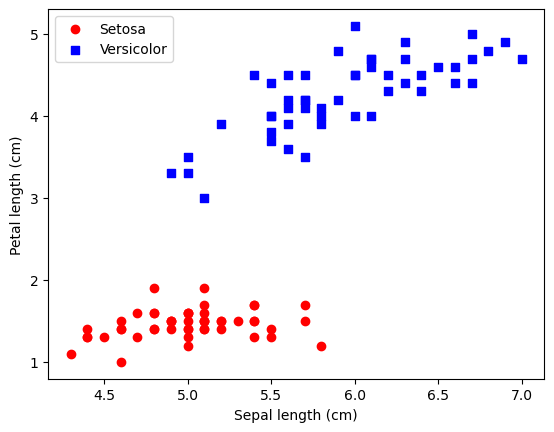

In [25]:
import matplotlib.pyplot as plt

y=df.iloc[0:100,4].values
y=np.where(y=='Iris-setosa',0,1)

#extract sepal and petal length 
X=df.iloc[0:100,[0,2]].values

plt.scatter(X[:50,0], X[:50,1], color='red', marker='o',label='Setosa')
plt.scatter(X[50:100,0], X[50:100,1], color='blue', marker='s',label='Versicolor')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Petal length (cm)')
plt.legend(loc='upper left')
plt.show

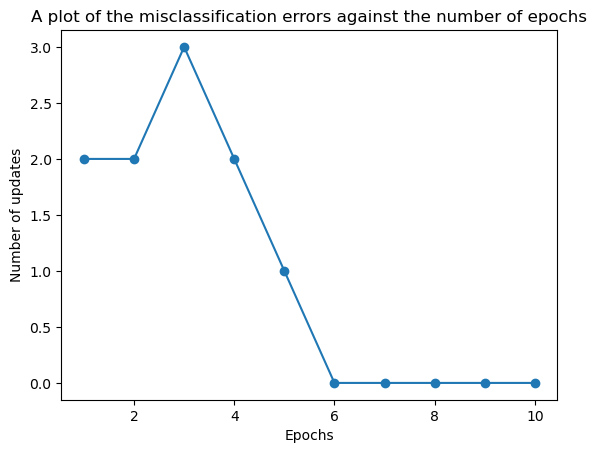

In [28]:
# training our perceptron algorithm
ppn= Perceptron(eta=0.1, n_iter=10)
ppn.fit(X,y)

#This line of code is plotting the number of misclassifications (errors) per epoch of the perceptron training. The x-axis shows the epoch number, and the y-axis shows the corresponding number of errors in that epoch.
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.title('A plot of the misclassification errors against the number of epochs')
plt.show()


### Plotting decision region

In [45]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X,y,classifier,resolution=0.02):
    
    markers=('o','s','^','v','<')
    colors=('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #plot decision surface
    x1_min, x1_max =X[:,0].min()-1,X[:,0].max()+1  # 0 is sepal length
    x2_min, x2_max =X[:,1].min()-1,X[:,1].max()+1  # 1 is petal length
    xx1,xx2= np.meshgrid(np.arange(x1_min, x1_max,resolution),
                         np.arange(x2_min, x2_max,resolution)) # creating co-ordinates 
    lab=classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T) ## co-ordinates predictions
    lab= lab.reshape(xx1.shape)
    
    plt.contourf(xx1,xx2,lab,alpha=0.3,cmap=cmap)
    plt.xlim(xx1.min(), xx2.max()) # x axis limit
    plt.ylim(xx2.min(), xx2.max()) # y axiz limit
    
    #plot class examples
    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0],
                    y=X[y==cl,1],
                    alpha=0.8,
                c=colors[idx],
                   marker=markers[idx],
                   label=f'Class {cl}',
                   edgecolor='black')

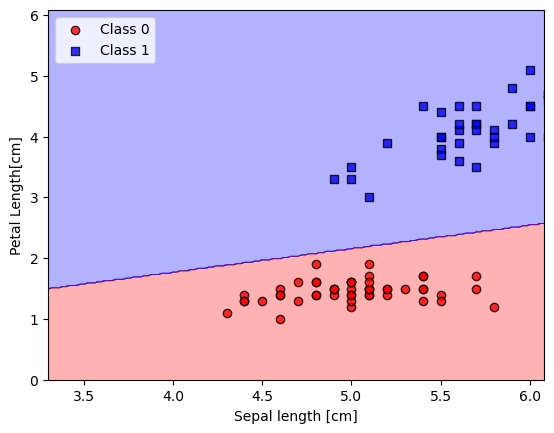

In [46]:
plot_decision_regions(X,y,classifier=ppn)
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal Length[cm]')
plt.legend(loc='upper left')
plt.show()

### Perceptron Convergence


Above classification was perfect as the dataset was linearly seperable, but incase of non-linear the convergence never stop unless epochs are set.
